In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import itertools
import seaborn as sns
from pandas.plotting import scatter_matrix




In [3]:
#
# Attribute Information:
# 	 1.	lettr	capital letter	(26 values from A to Z)
# 	 2.	x-box	horizontal position of box	(integer)
# 	 3.	y-box	vertical position of box	(integer)
# 	 4.	width	width of box			(integer)
# 	 5.	high 	height of box			(integer)
# 	 6.	onpix	total # on pixels		(integer)
# 	 7.	x-bar	mean x of on pixels in box	(integer)
# 	 8.	y-bar	mean y of on pixels in box	(integer)
# 	 9.	x2bar	mean x variance			(integer)
# 	10.	y2bar	mean y variance			(integer)
# 	11.	xybar	mean x y correlation		(integer)
# 	12.	x2ybr	mean of x * x * y		(integer)
# 	13.	xy2br	mean of x * y * y		(integer)
# 	14.	x-ege	mean edge count left to right	(integer)
# 	15.	xegvy	correlation of x-ege with y	(integer)
# 	16.	y-ege	mean edge count bottom to top	(integer)
# 	17.	yegvx	correlation of y-ege with x	(integer)

In [2]:
letterData = pd.read_csv('data/letterrecognitiondatacsv.csv')

#[x-box, y-box, width, height, onpix, x-bar, y-bar, x2bar, y2bar, x2ybr, xy2br, x-edg, xedgvy, y-edg, yedgvx]
features = []
letters = []
dataframe = []

#get features and labels (letters) from dataset and get dataframe set up properly
for i in range(0, len(letterData)):
    temp = letterData.iloc[i, 0]
    temp = temp.split(';')
    newTemp = [int(temp[i]) for i in range(1, len(temp))]
    letter = temp[0]
    features.append(newTemp)
    letters.append(letter)
    tempDF = newTemp
    tempDF.insert(len(newTemp), temp[0])
    dataframe.append(tempDF)
print(dataframe[0])

df = pd.DataFrame(dataframe, columns=['x-box', 'y-box', 'width', 'height', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-edge', 'yedgevx', 'letter'])


[5, 12, 3, 7, 2, 10, 5, 5, 4, 13, 3, 9, 2, 8, 4, 10, 'I']


In [5]:
#Checking if I set up the dataframe correctly
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    #print(df)
    pass

In [6]:
xbox = df['x-box']
ybox = df['y-box']

#[x-box, y-box, width, height, onpix, x-bar, y-bar, x2bar, y2bar, x2ybr, xy2br, x-edg, xedgvy, y-edg, yedgvx]
print(np.corrcoef(xbox, ybox))

## First we find the features with the greatest average intra class distances. Since we have 26 different lables, great
# variation could indicate a good descriptor, as small distances could indicate a universal descriptor for all letters
def getIntraClassDistance(featureList):
    diff = []

    for a, b in itertools.combinations(featureList, 2):
        diffVar = abs(b - a)
        diff.append(diffVar)

    std = np.std(diff)
    avgDistance = np.average(diff)

    return avgDistance, std

intraDistancesFeat = []
stdsFeat = []
for i in range(0, 16):
    feature = df.iloc[:, i]
    dist, stds = getIntraClassDistance(feature)
    intraDistancesFeat.append(dist)
    stdsFeat.append(stds)


print(intraDistancesFeat)
xlabels = ['x-box', 'y-box', 'width', 'height', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-edge', 'xedgevy', 'y-edge', 'yedgevx']



[[1.         0.75783104]
 [0.75783104 1.        ]]
[2.0925797064930753, 3.730329980845477, 2.230432273688892, 2.5346145495093535, 2.376646205047526, 2.156087772385419, 2.4881784243227565, 2.8779833231085497, 2.6597543598552065, 2.736447373423777, 2.8758669956700156, 2.23187336984611, 2.5016867305011417, 1.6641325715650719, 2.8901267645640507, 1.7144119532209234]


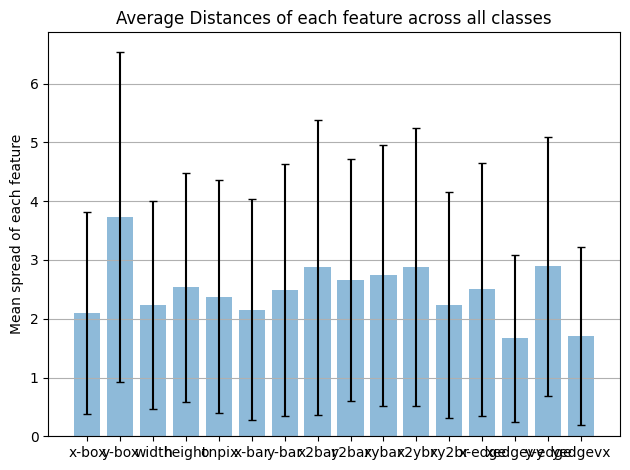

In [7]:
xcoord = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14 ,15, 16]
#print(len(xlabels))
#print(len(xcoord))
#print(len(intraDistances))
#plt.bar(xcoord, intraDistances)
#plt.xlabel(xlabels)
#plt.show()

fig, ax = plt.subplots()
ax.bar(xcoord, intraDistancesFeat, yerr=stdsFeat, align='center', alpha=0.5, ecolor='black', capsize=3)
ax.set_ylabel('Mean spread of each feature')
ax.set_xticks(xcoord)
ax.set_xticklabels(xlabels)
ax.set_title('Average Distances of each feature across all classes')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()

# There seems a relatively big average intra class distance between feature values for feature 'y-box'. ...
#.. ^this could indicate that the feature 'y-box' is more different for each letter than other features...
#.. it could also just be because there generally is a larger spread.
# A small average intra class distance for feature 'xedgevy' and 'yedgevx' indicate that they are not...
#..descriptive of individual letters.
# However, considering that there are 26 different labels (letters), the overall low average distances are quite alarming as it seems no single feature is nescesarily more telling than others...
#.. Dimensionality reduction might be difficult, but a correlation matrix should reveal more information about the features.


performing tsne with perplexity 30 and with 1000 iterations at max
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 19999 samples in 0.000s...


c:\Users\sebbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\sebbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 19999 samples in 10.178s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19999
[t-SNE] Computed conditional probabilities for sample 2000 / 19999
[t-SNE] Computed conditional probabilities for sample 3000 / 19999
[t-SNE] Computed conditional probabilities for sample 4000 / 19999
[t-SNE] Computed conditional probabilities for sample 5000 / 19999
[t-SNE] Computed conditional probabilities for sample 6000 / 19999
[t-SNE] Computed conditional probabilities for sample 7000 / 19999
[t-SNE] Computed conditional probabilities for sample 8000 / 19999
[t-SNE] Computed conditional probabilities for sample 9000 / 19999
[t-SNE] Computed conditional probabilities for sample 10000 / 19999
[t-SNE] Computed conditional probabilities for sample 11000 / 19999
[t-SNE] Computed conditional probabilities for sample 12000 / 19999
[t-SNE] Computed conditional probabilities for sample 13000 / 19999
[t-SNE] Computed conditional probabilities for sample 14000 / 1999

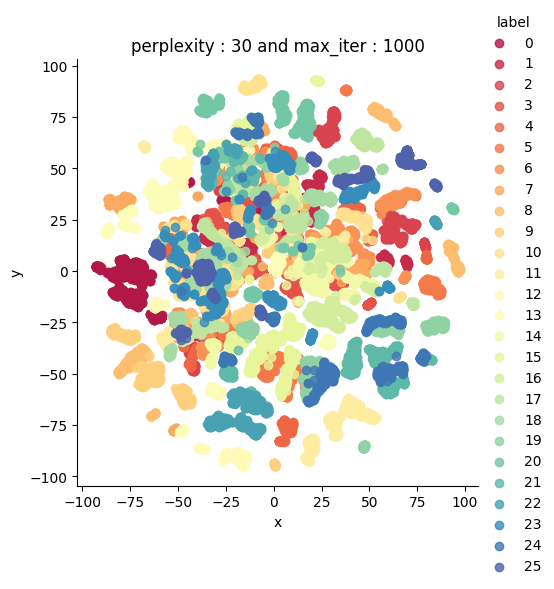

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 19999 samples in 0.001s...


c:\Users\sebbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\sebbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 19999 samples in 9.943s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19999
[t-SNE] Computed conditional probabilities for sample 2000 / 19999
[t-SNE] Computed conditional probabilities for sample 3000 / 19999
[t-SNE] Computed conditional probabilities for sample 4000 / 19999
[t-SNE] Computed conditional probabilities for sample 5000 / 19999
[t-SNE] Computed conditional probabilities for sample 6000 / 19999
[t-SNE] Computed conditional probabilities for sample 7000 / 19999
[t-SNE] Computed conditional probabilities for sample 8000 / 19999
[t-SNE] Computed conditional probabilities for sample 9000 / 19999
[t-SNE] Computed conditional probabilities for sample 10000 / 19999
[t-SNE] Computed conditional probabilities for sample 11000 / 19999
[t-SNE] Computed conditional probabilities for sample 12000 / 19999
[t-SNE] Computed conditional probabilities for sample 13000 / 19999
[t-SNE] Computed conditional probabilities for sample 14000 / 19999

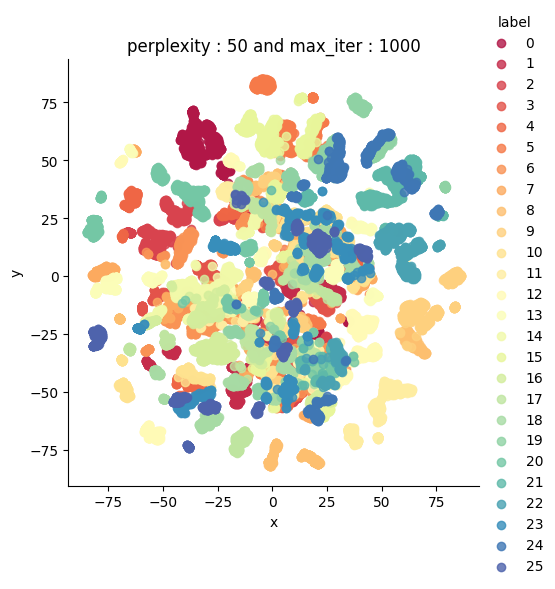

Done

performing tsne with perplexity 80 and with 1000 iterations at max
[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 19999 samples in 0.001s...


c:\Users\sebbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\sebbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 19999 samples in 9.888s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19999
[t-SNE] Computed conditional probabilities for sample 2000 / 19999
[t-SNE] Computed conditional probabilities for sample 3000 / 19999
[t-SNE] Computed conditional probabilities for sample 4000 / 19999
[t-SNE] Computed conditional probabilities for sample 5000 / 19999
[t-SNE] Computed conditional probabilities for sample 6000 / 19999
[t-SNE] Computed conditional probabilities for sample 7000 / 19999
[t-SNE] Computed conditional probabilities for sample 8000 / 19999
[t-SNE] Computed conditional probabilities for sample 9000 / 19999
[t-SNE] Computed conditional probabilities for sample 10000 / 19999
[t-SNE] Computed conditional probabilities for sample 11000 / 19999
[t-SNE] Computed conditional probabilities for sample 12000 / 19999
[t-SNE] Computed conditional probabilities for sample 13000 / 19999
[t-SNE] Computed conditional probabilities for sample 14000 / 19999

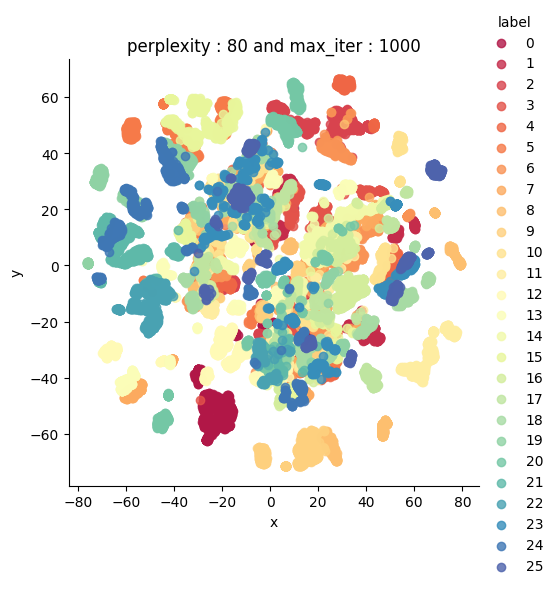

Done


C:\Users\sebbe\AppData\Local\Temp\ipykernel_18672\4057106327.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('letter', axis=1, inplace=True)
C:\Users\sebbe\AppData\Local\Temp\ipykernel_18672\4057106327.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('letter', axis=1, inplace=True)
C:\Users\sebbe\AppData\Local\Temp\ipykernel_18672\4057106327.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('letter',

Interclass distance of combination AB: 8.25100417164975
Interclass distance of combination AC: 10.686938851252
Interclass distance of combination AD: 7.898853997387854
Interclass distance of combination AE: 9.506678959185942
Interclass distance of combination AF: 11.409537722674502
Interclass distance of combination AG: 7.94654979656379
Interclass distance of combination AH: 7.5529033713497205
Interclass distance of combination AI: 7.91175893422575
Interclass distance of combination AJ: 6.803634228279746
Interclass distance of combination AK: 7.830284547501946
Interclass distance of combination AL: 7.150773844794352
Interclass distance of combination AM: 9.01069526996971
Interclass distance of combination AN: 8.380617382168207
Interclass distance of combination AO: 7.621274923387006
Interclass distance of combination AP: 10.428827908721347
Interclass distance of combination AQ: 7.680101788099769
Interclass distance of combination AR: 7.310083479152199
Interclass distance of combination

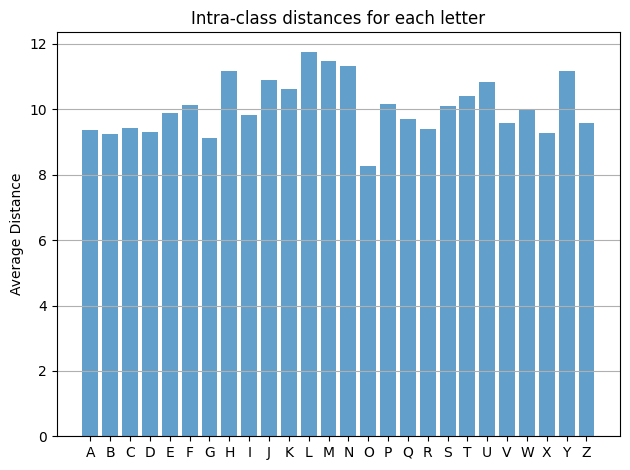

In [6]:

gDF = df.groupby('letter')
sortedletterDF = [gDF.get_group(x) for x in gDF.groups]

aDF = sortedletterDF[0]

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    #print(aDF)
    pass

#print(aDF.iloc[0])
#print(aDF.iloc[1])

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.patheffects as PathEffects

TSNEdf = df.drop(columns=['letter'])
#tsne = TSNE(perplexity=40)
#tsne_results = tsne.fit_transform(TSNEdf.values)



def plot_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))
    print(palette)
    
    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1],  c=palette[colors.astype(np.int)], cmap=plt.cm.get_cmap('Paired'))
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    plt.legend(loc="upper left")
    ax.axis('tight')# add the labels for each digit corresponding to the label
    txts = []
    for i in range(num_classes):# Position of each label at median of data points.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    
    plt.show()
    return f, ax, sc, txts

from sklearn.preprocessing import LabelEncoder
import seaborn as sns
encoder = LabelEncoder()
encoder.fit(df['letter'])
encoded_Y = encoder.transform(df['letter'])

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
        for index,perplexity in enumerate(perplexities):
            # perform t-sne
            print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
            X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
            print('Done..')
            
            # prepare the data for seaborn         
            print('Creating plot for this t-sne visualization..')
            df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
            
            # draw the plot in appropriate place in the grid
            sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, \
                    palette="Spectral")
            plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
            img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
            print('saving this plot as image in present working directory...')
            plt.savefig(img_name)
            plt.show()
            print('Done')


#plot_scatter(tsne_results, encoded_Y)
perform_tsne(TSNEdf.values, encoded_Y, [30, 50, 80])

def getRealIntraClassDistance(dfs):
    intraDistanceList = []
    intraSTDList = []
    for i in range(0, len(dfs)):

        df = dfs[i]
        intraClassDistance4Real = 0
        rowList = []
        
        df.drop('letter', axis=1, inplace=True)

        for i in range(0, len(df.iloc[:, 0])):
            rowTemp = df.iloc[i]
            rowList.append(rowTemp)

        npRowList = np.array(rowList)
        forStds = []
        for i in range(len(npRowList)):
            for j in range(i+1, len(npRowList)):
                # Calculate the Euclidean distance between example i and example j
                distance = np.linalg.norm(npRowList[i] - npRowList[j])
                forStds.append(distance)
                intraClassDistance4Real += distance

        # Divide the total distance by the number of pairs to get the average intra-class distance
        intraClassDistance4Real /= len(npRowList) * (len(npRowList) - 1) / 2
        intraSTD = np.std(forStds)
        #print(intraClassDistance4Real)
        intraDistanceList.append(intraClassDistance4Real)
        intraSTDList.append(intraSTD)
        #print(npRowList[0])
    
    return intraDistanceList, intraSTDList

def getRealInterClassDinstace(dfs):
    interDistanceList = []
    letterList = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
    centroids = []
    combination = []
    for i in range(0, len(dfs)):
        
        df = dfs[i]
        intraClassDistance4Real = 0
        rowList = []
        #df.drop('letter', axis=1, inplace=True)

        for i in range(0, len(df.iloc[:, 0])):
            rowTemp = df.iloc[i]
            rowList.append(rowTemp)
        
        rowList = np.array(rowList)
        centr = np.mean(rowList, axis=0)
        centroids.append(centr)

    centroids = np.array(centroids)
    for i in range(len(centroids)):
        for j in range(i+1, len(centroids)):
            # Calculate the Euclidean distance between example i and example j
            distance = np.linalg.norm(centroids[i] - centroids[j])
            interDistanceList.append(distance)
            combination.append(f"{letterList[i]}/{letterList[j]}")
            print(f"Interclass distance of combination {letterList[i]}{letterList[j]}: {distance}")
            with open('data.txt', 'a') as f:
                f.write(f"{letterList[i]}/{letterList[j]}: {distance} \n")
    
    return interDistanceList, combination

    
lettersforplot = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

intraDistances, intraCStds = getRealIntraClassDistance(sortedletterDF)
interDistances, combinations = getRealInterClassDinstace(sortedletterDF)

fig, ax = plt.subplots()
ax.bar(lettersforplot, intraDistances, align='center', alpha=0.7, ecolor='black', capsize=3)
ax.set_ylabel('Average Distance')
ax.set_title("Intra-class distances for each letter")
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()



C:\Users\sebbe\AppData\Local\Temp\ipykernel_15072\3370882028.py:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correaMAT = df2.corr()


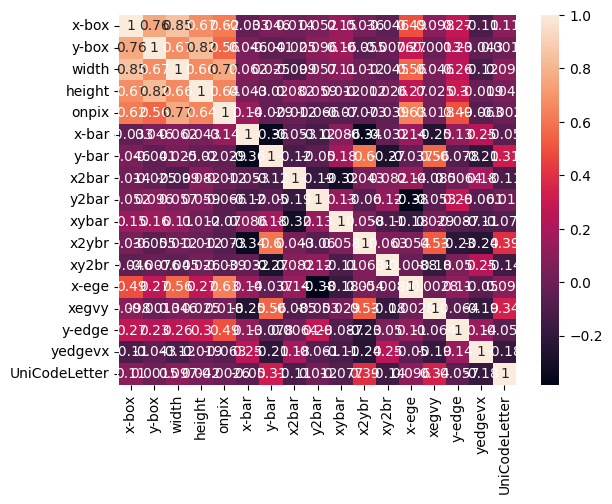

C:\Users\sebbe\AppData\Local\Temp\ipykernel_15072\3370882028.py:37: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correaMAT2 = df.corr()


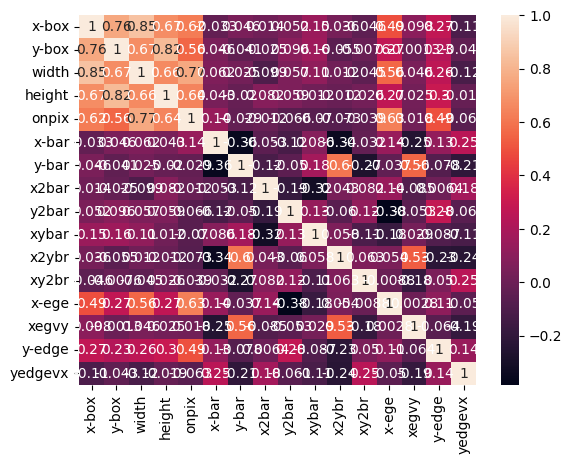

                  x-box     y-box     width    height     onpix     x-bar  \
x-box          1.000000  0.757831  0.851506  0.672774  0.619074 -0.032567   
y-box          0.757831  1.000000  0.671947  0.823212  0.555103  0.045682   
width          0.851506  0.671947  1.000000  0.660225  0.765702  0.061989   
height         0.672774  0.823212  0.660225  1.000000  0.644378  0.042849   
onpix          0.619074  0.555103  0.765702  0.644378  1.000000  0.139196   
x-bar         -0.032567  0.045682  0.061989  0.042849  0.139196  1.000000   
y-bar          0.045678 -0.040966  0.024960 -0.020055 -0.028692 -0.356697   
x2bar          0.014217 -0.024996 -0.098711  0.082375 -0.012084 -0.053264   
y2bar          0.052106  0.096473  0.057094  0.059035 -0.065540 -0.122861   
xybar          0.148015  0.159971  0.114976  0.012450 -0.069833  0.085991   
x2ybr          0.035538 -0.054671  0.011766 -0.011981 -0.072870 -0.342012   
xy2br         -0.046333 -0.007568 -0.045008  0.026387 -0.038857 -0.032116   

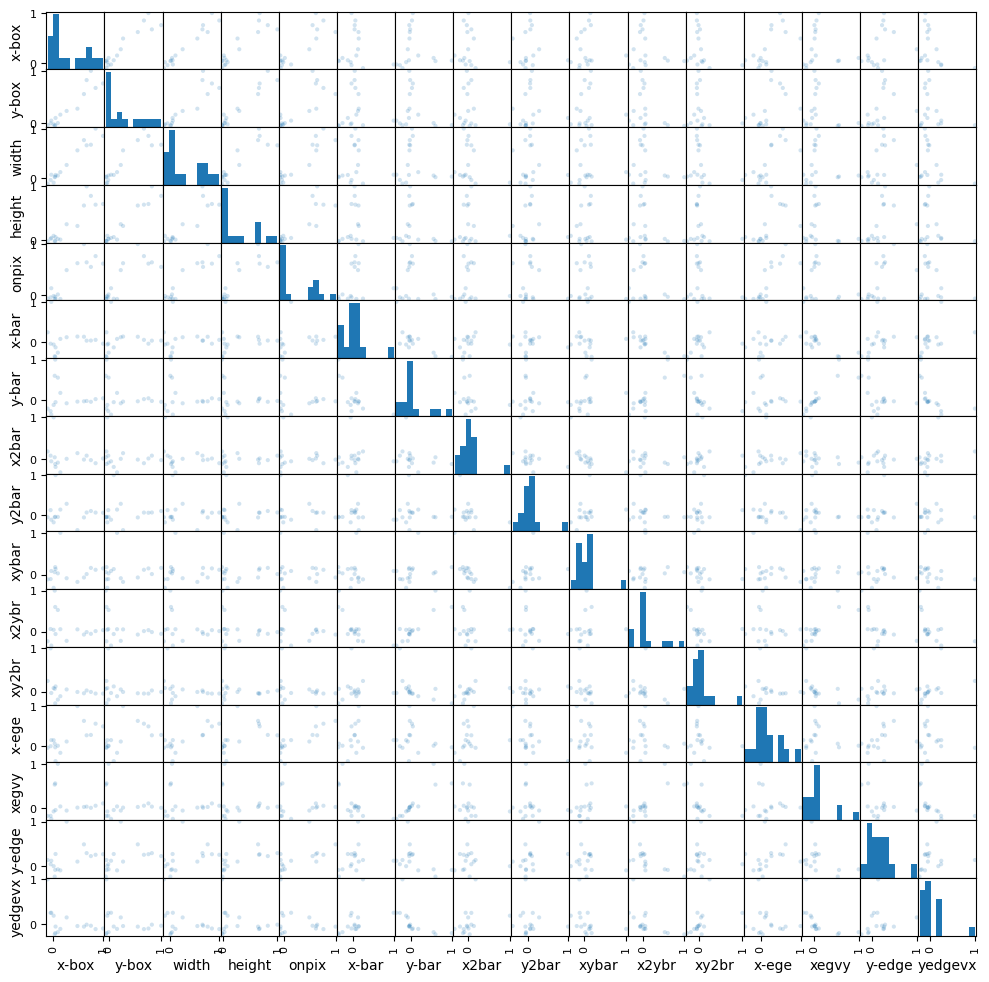

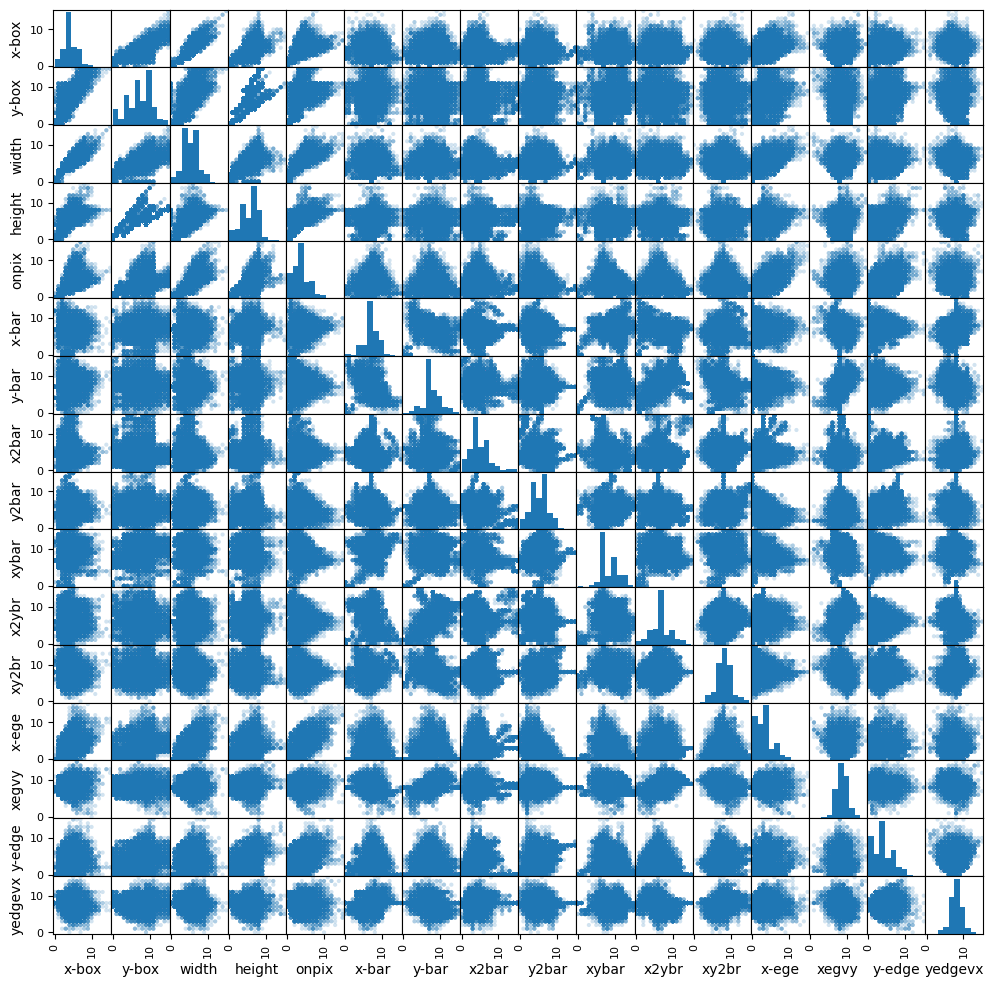

In [45]:
# I want to to check for correalations between feature values and their respective labels.
# First we need to map the letter to numbers, so they can be plotted in the matrix

""" 
aDF = sortedletterDF[0]
letterInt2 = []
print(aDF.iloc[:, 15])
for i in range(len(aDF.iloc[:, 15])):
    tempLetter = aDF.iloc[i, 15]
    letterInt2.append(ord(tempLetter))
    #print(ord(tempLetter))

aDF2 = aDF.assign(UniCodeLetter=letterInt2)
aDF2.drop('letter', axis=1, inplace=True) 
print(aDF2.iloc[:, 16])
correaMAT = aDF2.corr()
sns.heatmap(correaMAT, annot=True)
plt.show() """

#sns.kdeplot(data=df)
#plt.show()




letterInt = []
for i in range(len(df.iloc[:, 16])):
    tempLetter = df.iloc[i, 16]
    letterInt.append(ord(tempLetter))

df2 = df.assign(UniCodeLetter=letterInt)

correaMAT = df2.corr()
sns.heatmap(correaMAT, annot=True)
plt.show()

correaMAT2 = df.corr()
sns.heatmap(correaMAT2, annot=True)
plt.show()

scatter_matrix(correaMAT2, alpha=0.2, figsize=(12, 12))

scatter_matrix(df, alpha=0.2, figsize=(12, 12))

print(correaMAT)



In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import tensorflow as tf

#### Time to test a selection of models. For the first model I will train a simple neural network 

# load dataset
dataset = df.values
#print(dataset)

X = dataset[:,2:16].astype(float)
#print(X[0])
Y = letters
#print(letters)






c:\Users\sebbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\sebbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [27]:




encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y, num_classes=26)

X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.20, random_state=42)
# encode class values as integers

# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(16, input_dim=16, activation='relu'))
	model.add(Dense(26, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

(19999, 2)
[-6.3501887  3.4435503]
[-6.3501887  3.4435503]


In [28]:
model = baseline_model()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=8)
model.fit(X_train, y_train, epochs=250, batch_size=8)

Epoch 1/250
2000/2000 [==============================] - 3s 1ms/step - loss: 2.3078 - accuracy: 0.3665
Epoch 2/250
2000/2000 [==============================] - 2s 1ms/step - loss: 1.2647 - accuracy: 0.6577
Epoch 3/250
2000/2000 [==============================] - 2s 1ms/step - loss: 1.0955 - accuracy: 0.6997
Epoch 4/250
2000/2000 [==============================] - 2s 1ms/step - loss: 1.0004 - accuracy: 0.7184
Epoch 5/250
2000/2000 [==============================] - 2s 1ms/step - loss: 0.9343 - accuracy: 0.7360
Epoch 6/250
2000/2000 [==============================] - 2s 1ms/step - loss: 0.8861 - accuracy: 0.7465
Epoch 7/250
2000/2000 [==============================] - 2s 1ms/step - loss: 0.8490 - accuracy: 0.7515
Epoch 8/250
2000/2000 [==============================] - 2s 1ms/step - loss: 0.8221 - accuracy: 0.7601
Epoch 9/250
2000/2000 [==============================] - 2s 1ms/step - loss: 0.8002 - accuracy: 0.7649
Epoch 10/250
2000/2000 [==============================] - 2s 1ms/step - l

In [12]:
predictions = []
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
print(len(X_test))

# summarize history for loss
""" plt.plot(model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show() """


prediction = model.predict(X_test)
predictions.append(prediction)

"""
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(len(prediction))
    print(prediction[0][:])
    print(prediction.shape)
    print(prediction[0][:])

The output layer uses the softmax activation function rather than the sigmoid activation function. Each neuron
in the output layer yields a probability for the corresponding class, and thanks to the softmax function, the sum of all the probabilities is 1.0. 
"""
## lav loop som looper igennem hver af de 4000 prediction arrays (len=26) og tager index af den med højeste probabillity tjekker i letter index hvilken letter det korresponderer med

trueindexes = []
pred_indexes = []
pred_letters = []
true_letters = []

print(y_test[0])

tpNN = 0
fpNN = 0

for i in range(0, len(prediction)):
    index = 0
    trueindex = 0
    #print(prediction[i][:])
    temp = prediction[i][:]
    tempy = y_test[i][:]
    for j in range(0, len(prediction[i][:])):
        if temp[j] == max(prediction[i][:]):
            index = j
        #print(y_test[j])
        if tempy[j] == 1:
            trueindex = j
    

    if index == trueindex:
        tpNN += 1
    elif index != trueindex:
        fpNN += 1

    #print(max(prediction[i][:]))
    #print(y_test[i])
    pred_letters.append(lettersforplot[index])
    true_letters.append(lettersforplot[trueindex])

    trueindexes.append(trueindex)
    pred_indexes.append(index)





4000
125/125 [==============================] - 0s 869us/step
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0.]


4000
Accuracy: 0.82125
ACRR  [144 156 137 148 150 166 161 153 139 141 132 170 158 164 153 159 158 163
 151 155 149 159 170 170 146 148]
prec  [127 183 154 148 149 148 171 148 135 127 131 162 174 135 161 155 175 168
 128 164 155 145 176 162 169 150]
recall:  [0.85416667 0.85897436 0.81751825 0.83108108 0.77333333 0.72891566
 0.74534161 0.69934641 0.89208633 0.85815603 0.75757576 0.87647059
 0.93037975 0.78658537 0.83006536 0.85534591 0.84810127 0.7607362
 0.62913907 0.78064516 0.90604027 0.8427673  0.91764706 0.77647059
 0.89041096 0.91216216]
precision:  [0.96850394 0.73224044 0.72727273 0.83108108 0.77852349 0.81756757
 0.70175439 0.72297297 0.91851852 0.95275591 0.76335878 0.91975309
 0.84482759 0.95555556 0.78881988 0.87741935 0.76571429 0.73809524
 0.7421875  0.73780488 0.87096774 0.92413793 0.88636364 0.81481481
 0.76923077 0.9       ]
mean precision:  0.8250093098326761
mean reacall:  0.8215177880271765


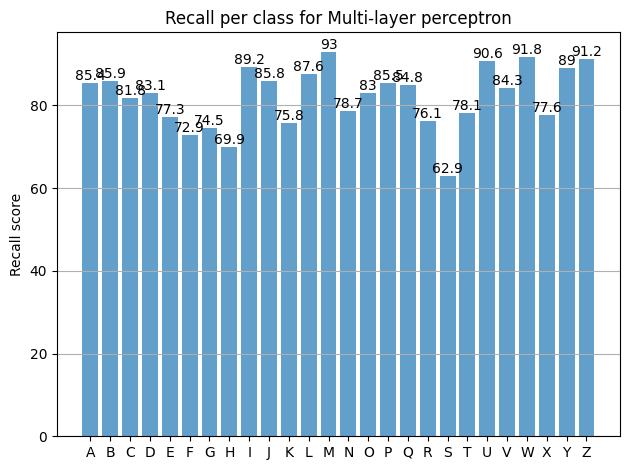

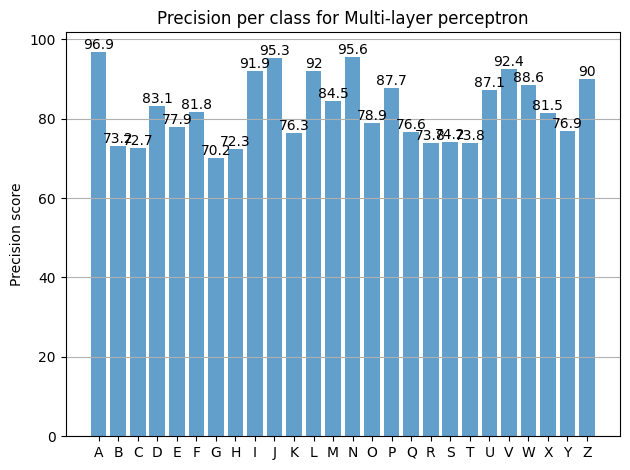

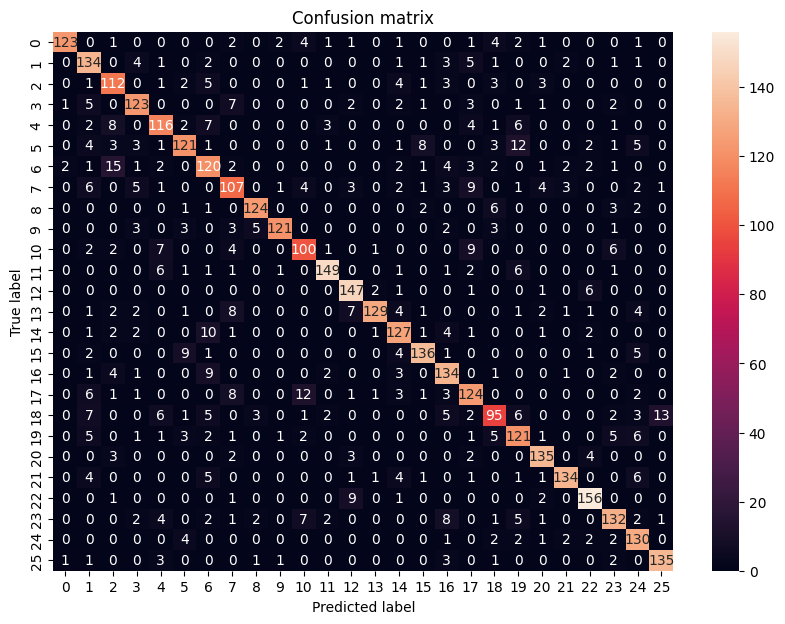

In [13]:
from sklearn.metrics import accuracy_score
print(len(true_letters))
# Calculate the confusion matrix
cfmatrix = confusion_matrix(trueindexes, pred_indexes)

#print(cfmatrix)
recall = np.diag(cfmatrix) / np.sum(cfmatrix, axis = 1)
precision = np.diag(cfmatrix) / np.sum(cfmatrix, axis = 0)

accuracy = accuracy_score(trueindexes, pred_indexes)

print('Accuracy:', accuracy)
print("ACRR ", np.sum(cfmatrix, axis = 1))
print("prec ", np.sum(cfmatrix, axis = 0))

print("recall: ", recall)
print("precision: ", precision)
print("mean precision: ", np.mean(precision))
print("mean reacall: ", np.mean(recall))
for i in range(0, len(recall)):
    recall[i] = round(recall[i]*100, 1)

for i in range(0, len(precision)):
    precision[i] = round(precision[i]*100, 1)

fig, ax = plt.subplots()
ax.bar(lettersforplot, recall, align='center', alpha=0.7, ecolor='black', capsize=3)
ax.set_ylabel('Recall score')
ax.set_title("Recall per class for Multi-layer perceptron")
ax.yaxis.grid(True)
for bars in ax.containers:
    ax.bar_label(bars)
# Save the figure and show
plt.tight_layout()
plt.show()

fig, ax = plt.subplots()
ax.bar(lettersforplot, precision, align='center', alpha=0.7, ecolor='black', capsize=3)
ax.set_ylabel('Precision score')
ax.set_title("Precision per class for Multi-layer perceptron")
ax.yaxis.grid(True)
for bars in ax.containers:
    ax.bar_label(bars)
# Save the figure and show
plt.tight_layout()
plt.show()



# Set the figure size
plt.figure(figsize=(10, 7))

# Plot the heatmap
sns.heatmap(cfmatrix, annot=True, fmt='d')

# Add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')

# Show the plot
plt.show()



Accuracy: 0.9967019230769231
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

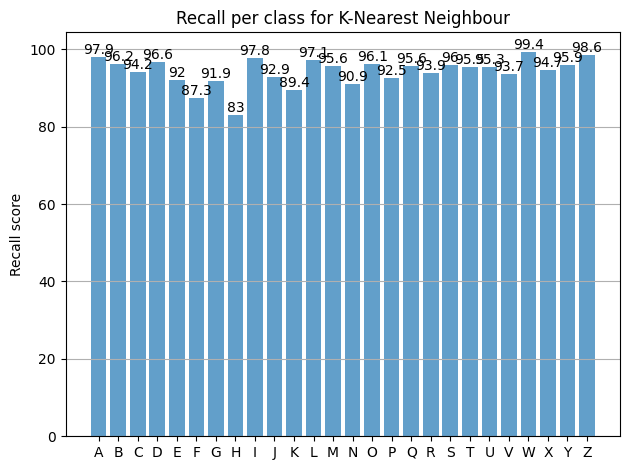

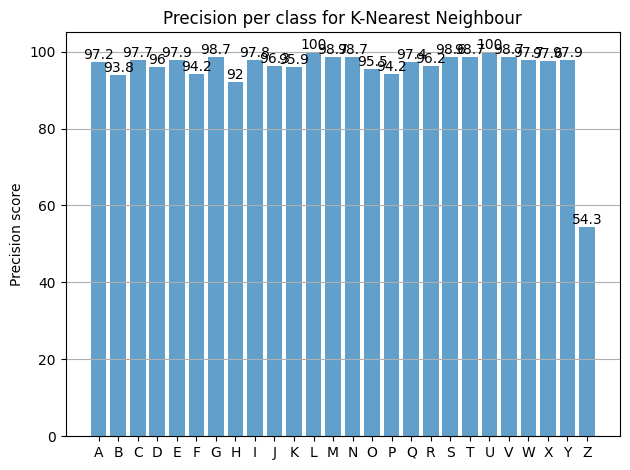

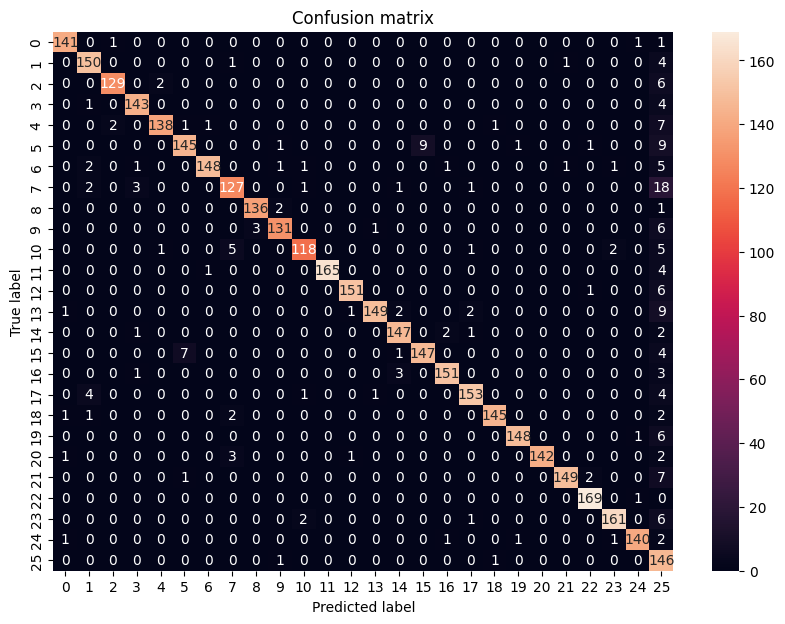

In [14]:
#### The Second model will be KNN
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = np.mean(y_pred == y_test)
print('Accuracy:', accuracy)
print(y_pred)

trueindexes = []
pred_indexes = []
pred_letters = []
true_letters = []

print(y_test[0])

tpKNN = 0
fpKNN = 0

for i in range(0, len(y_pred)):
    index = 0
    trueindex = 0
    #print(prediction[i][:])
    temp = y_pred[i][:]
    tempy = y_test[i][:]
    for j in range(0, len(y_pred[i][:])):
        if temp[j] == max(y_pred[i][:]):
            index = j
        #print(y_test[j])
        if tempy[j] == 1:
            trueindex = j
    

    if index == trueindex:
        tpKNN += 1
    elif index != trueindex:
        fpKNN += 1

    #print(max(prediction[i][:]))
    #print(y_test[i])
    pred_letters.append(lettersforplot[index])
    true_letters.append(lettersforplot[trueindex])

    trueindexes.append(trueindex)
    pred_indexes.append(index)

print(len(true_letters))
# Calculate the confusion matrix
cfmatrix = confusion_matrix(trueindexes, pred_indexes)

recall = np.diag(cfmatrix) / np.sum(cfmatrix, axis = 1)
precision = np.diag(cfmatrix) / np.sum(cfmatrix, axis = 0)

print("recall: ", recall)
print("precision: ", precision)
print("mean precision: ", np.mean(precision))
print("mean reacall: ", np.mean(recall))
for i in range(0, len(recall)):
    recall[i] = round(recall[i]*100, 1)

for i in range(0, len(precision)):
    precision[i] = round(precision[i]*100, 1)

fig, ax = plt.subplots()
ax.bar(lettersforplot, recall, align='center', alpha=0.7, ecolor='black', capsize=3)
ax.set_ylabel('Recall score')
ax.set_title("Recall per class for K-Nearest Neighbour")
ax.yaxis.grid(True)
for bars in ax.containers:
    ax.bar_label(bars)
# Save the figure and show
plt.tight_layout()
plt.show()

fig, ax = plt.subplots()
ax.bar(lettersforplot, precision, align='center', alpha=0.7, ecolor='black', capsize=3)
ax.set_ylabel('Precision score')
ax.set_title("Precision per class for K-Nearest Neighbour")
ax.yaxis.grid(True)
for bars in ax.containers:
    ax.bar_label(bars)
# Save the figure and show
plt.tight_layout()
plt.show()



# Set the figure size
plt.figure(figsize=(10, 7))

# Plot the heatmap
sns.heatmap(cfmatrix, annot=True, fmt='d')

# Add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')

# Show the plot
plt.show()

In [15]:
#### The Third model to test is SVM
from sklearn.svm import SVC

# Create the SVM classifier
svm = SVC(kernel='poly', decision_function_shape='ovo')

# Train the classifier
y_train_int = integers = np.argmax(y_train, axis=1)
svm.fit(X_train, y_train_int)


# Make predictions on the testing set
y_pred = svm.predict(X_test)
y_test_int = np.argmax(y_test, axis=1)
# Calculate the accuracy of the predictions
accuracy = np.mean(y_pred == trueindexes)
print('Accuracy:', accuracy)


Accuracy: 0.945


recall:  [0.97222222 0.93589744 0.93430657 0.98648649 0.96666667 0.92168675
 0.91304348 0.83660131 0.98561151 0.93617021 0.90151515 0.94705882
 0.9556962  0.93292683 0.97385621 0.94968553 0.96202532 0.91411043
 0.93377483 0.93548387 0.98657718 0.9245283  0.97058824 0.95294118
 0.96575342 0.97972973]
precision:  [0.97902098 0.90123457 0.93430657 0.8902439  0.87878788 0.92168675
 0.9245283  0.90780142 0.96478873 0.9924812  0.8880597  0.98773006
 0.97419355 0.96835443 0.93710692 0.97419355 0.96202532 0.87647059
 0.97241379 0.9602649  0.96710526 0.95454545 0.95930233 0.95294118
 0.97916667 0.97972973]
mean precision:  0.9457109124250813
mean reacall:  0.9451901495289532


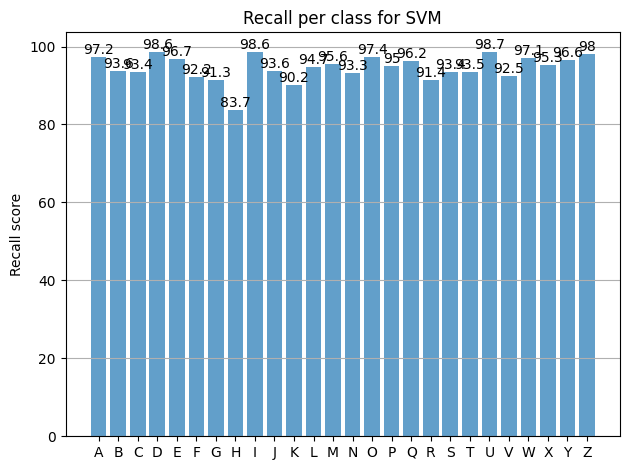

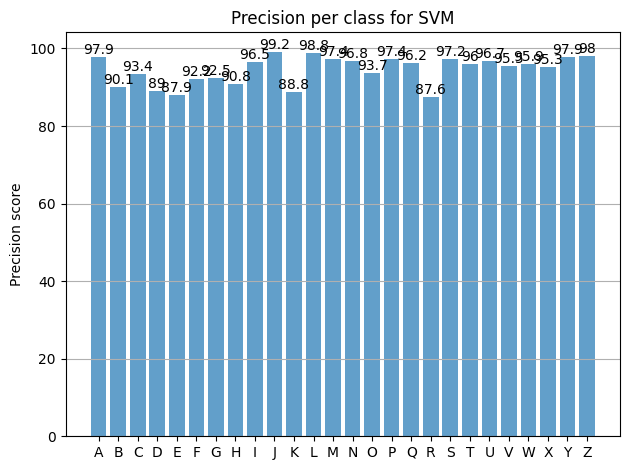

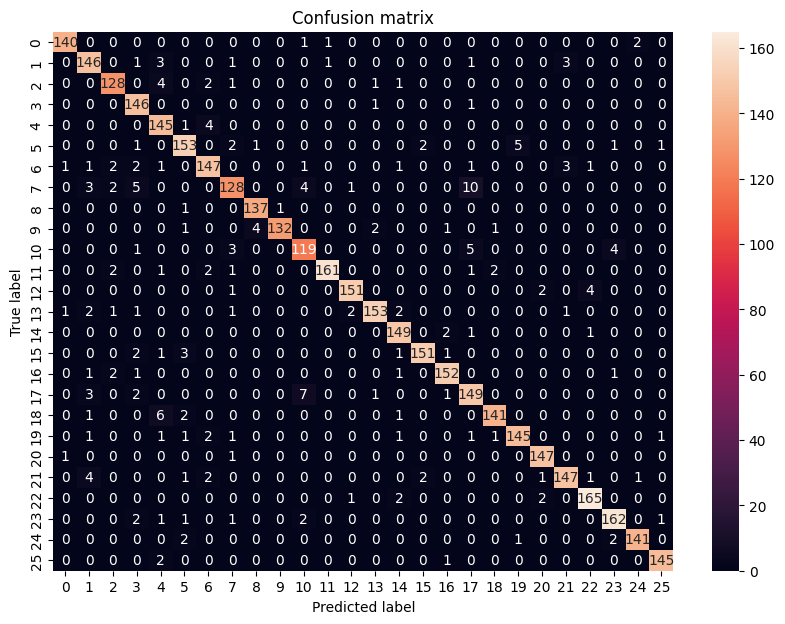

In [16]:

cfmatrix = confusion_matrix(y_test_int, y_pred)

recall = np.diag(cfmatrix) / np.sum(cfmatrix, axis = 1)
precision = np.diag(cfmatrix) / np.sum(cfmatrix, axis = 0)

print("recall: ", recall)
print("precision: ", precision)
print("mean precision: ", np.mean(precision))
print("mean reacall: ", np.mean(recall))
for i in range(0, len(recall)):
    recall[i] = round(recall[i]*100, 1)

for i in range(0, len(precision)):
    precision[i] = round(precision[i]*100, 1)

fig, ax = plt.subplots()
ax.bar(lettersforplot, recall, align='center', alpha=0.7, ecolor='black', capsize=3)
ax.set_ylabel('Recall score')
ax.set_title("Recall per class for SVM")
ax.yaxis.grid(True)
for bars in ax.containers:
    ax.bar_label(bars)
# Save the figure and show
plt.tight_layout()
plt.show()

fig, ax = plt.subplots()
ax.bar(lettersforplot, precision, align='center', alpha=0.7, ecolor='black', capsize=3)
ax.set_ylabel('Precision score')
ax.set_title("Precision per class for SVM")
ax.yaxis.grid(True)
for bars in ax.containers:
    ax.bar_label(bars)
# Save the figure and show
plt.tight_layout()
plt.show()



# Set the figure size
plt.figure(figsize=(10, 7))

# Plot the heatmap
sns.heatmap(cfmatrix, annot=True, fmt='d')

# Add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')

# Show the plot
plt.show()